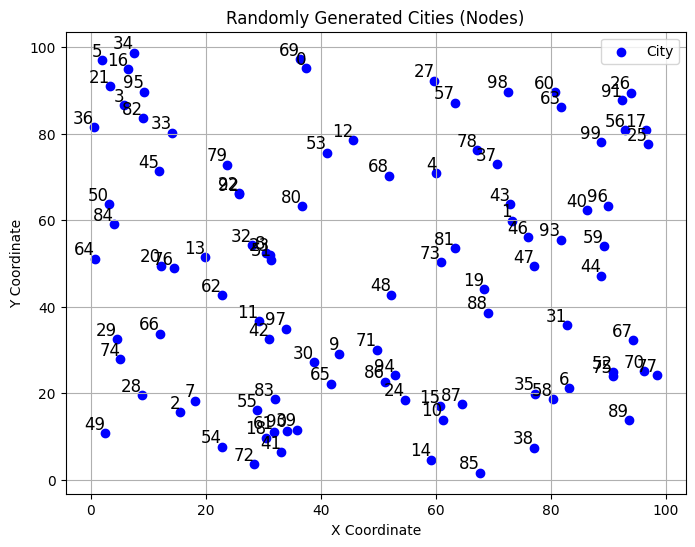

Route: [0, 69, 12, 53, 68, 4, 78, 37, 43, 1, 46, 93, 47, 19, 88, 31, 67, 70, 77, 75, 52, 6, 58, 35, 38, 85, 14, 10, 15, 87, 24, 86, 94, 71, 9, 30, 65, 83, 55, 61, 18, 90, 39, 41, 72, 54, 2, 7, 28, 74, 29, 66, 62, 11, 42, 97, 51, 23, 8, 32, 13, 76, 20, 64, 84, 50, 45, 33, 82, 3, 95, 16, 34, 5, 21, 36, 79, 22, 92, 80, 48, 73, 81, 40, 96, 59, 44, 99, 56, 17, 25, 91, 26, 63, 60, 98, 57, 27, 89, 49, 0]
Total Distance: 1006.40


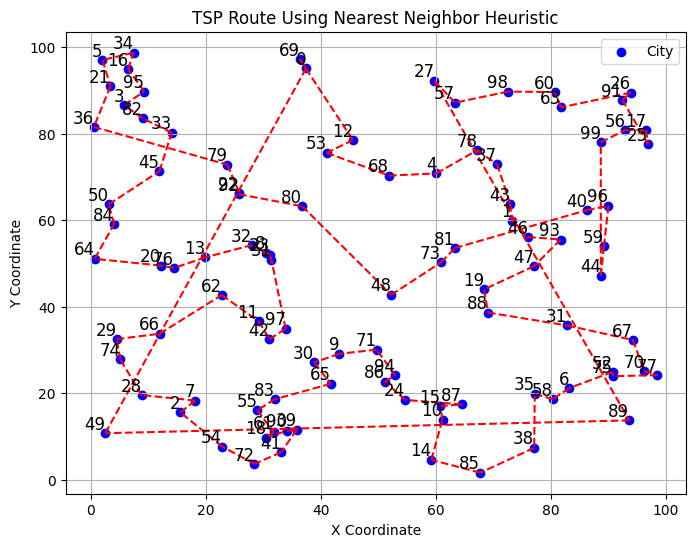

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial import distance_matrix

# Step 1: Generate Random Cities (nodes)
def generate_cities(num_cities, seed=42):
    """Generate random coordinates for cities."""
    np.random.seed(seed)
    return np.random.rand(num_cities, 2) * 100  # Generate coordinates in a 100x100 grid

num_cities = 10  # Feel free to increase this for more complex instances
cities = generate_cities(num_cities)

# Step 2: Visualize the Cities
plt.figure(figsize=(8, 6))
plt.scatter(cities[:, 0], cities[:, 1], c='blue', label='City')
for i, (x, y) in enumerate(cities):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')
plt.title("Randomly Generated Cities (Nodes)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()

# Step 3: Compute Distance Matrix
dist_matrix = distance_matrix(cities, cities)
dist_matrix


def generate_cities(num_cities, seed=42):
    """Generate random coordinates for cities."""
    np.random.seed(seed)
    return np.random.rand(num_cities, 2) * 100  # Generate coordinates in a 100x100 grid

num_cities = 10  # Feel free to increase this for more complex instances
cities = generate_cities(num_cities)


dist_matrix = distance_matrix(cities, cities)

def nearest_neighbor_tsp(dist_matrix, start_city=0):
    """
    Nearest Neighbor heuristic for solving the TSP.
    
    Parameters:
    - dist_matrix (numpy.ndarray): Distance matrix representing travel costs between cities.
    - start_city (int): Index of the starting city.
    
    Returns:
    - route (list): Order of cities visited.
    - total_distance (float): Total distance of the route.
    """
    num_cities = len(dist_matrix)
    visited = [False] * num_cities
    route = [start_city]
    total_distance = 0
    current_city = start_city
    visited[current_city] = True
    
    for _ in range(num_cities - 1):
        # Find the nearest unvisited city
        nearest_distance = float('inf')
        nearest_city = None
        for city in range(num_cities):
            if not visited[city] and dist_matrix[current_city, city] < nearest_distance:
                nearest_distance = dist_matrix[current_city, city]
                nearest_city = city
        
        # Move to the nearest city
        route.append(nearest_city)
        total_distance += nearest_distance
        current_city = nearest_city
        visited[current_city] = True
    
    # Return to the starting city
    total_distance += dist_matrix[current_city, start_city]
    route.append(start_city)
    
    return route, total_distance

# Solve the TSP using the Nearest Neighbor heuristic
route, total_distance = nearest_neighbor_tsp(dist_matrix)

# Display the results
print(f"Route: {route}")
print(f"Total Distance: {total_distance:.2f}")

# Visualize the route
plt.figure(figsize=(8, 6))
plt.scatter(cities[:, 0], cities[:, 1], c='blue', label='City')
for i, (x, y) in enumerate(cities):
    plt.text(x, y, f"{i}", fontsize=12, ha='right', va='bottom')

# Plot the route
for i in range(len(route) - 1):
    start, end = route[i], route[i + 1]
    plt.plot([cities[start, 0], cities[end, 0]], [cities[start, 1], cities[end, 1]], 'r--')


plt.title("TSP Route Using Nearest Neighbor Heuristic")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.legend()
plt.show()
